The goal is to classify patients with acute myeloid leukemia (AML) and acute lymphoblastic leukemia (ALL) using the SVM algorithm.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
train_data = pd.read_csv('data/data_set_ALL_AML_train.csv')
test_data = pd.read_csv('data/data_set_ALL_AML_independent.csv')
labels = pd.read_csv('data/actual.csv')

In [3]:
train_data.head()

,Gene Description,Gene Accession Number,1,call,2,call.1,3,call.2,4,call.3,...,29,call.33,30,call.34,31,call.35,32,call.36,33,call.37
0,AFFX-BioB-5_at (endogenous control),AFFX-BioB-5_at,-214,A,-139,A,-76,A,-135,A,...,15,A,-318,A,-32,A,-124,A,-135,A
1,AFFX-BioB-M_at (endogenous control),AFFX-BioB-M_at,-153,A,-73,A,-49,A,-114,A,...,-114,A,-192,A,-49,A,-79,A,-186,A
2,AFFX-BioB-3_at (endogenous control),AFFX-BioB-3_at,-58,A,-1,A,-307,A,265,A,...,2,A,-95,A,49,A,-37,A,-70,A
3,AFFX-BioC-5_at (endogenous control),AFFX-BioC-5_at,88,A,283,A,309,A,12,A,...,193,A,312,A,230,P,330,A,337,A
4,AFFX-BioC-3_at (endogenous control),AFFX-BioC-3_at,-295,A,-264,A,-376,A,-419,A,...,-51,A,-139,A,-367,A,-188,A,-407,A


In [4]:
test_data.head()

,Gene Description,Gene Accession Number,39,call,40,call.1,42,call.2,47,call.3,...,65,call.29,66,call.30,63,call.31,64,call.32,62,call.33
0,AFFX-BioB-5_at (endogenous control),AFFX-BioB-5_at,-342,A,-87,A,22,A,-243,A,...,-62,A,-58,A,-161,A,-48,A,-176,A
1,AFFX-BioB-M_at (endogenous control),AFFX-BioB-M_at,-200,A,-248,A,-153,A,-218,A,...,-198,A,-217,A,-215,A,-531,A,-284,A
2,AFFX-BioB-3_at (endogenous control),AFFX-BioB-3_at,41,A,262,A,17,A,-163,A,...,-5,A,63,A,-46,A,-124,A,-81,A
3,AFFX-BioC-5_at (endogenous control),AFFX-BioC-5_at,328,A,295,A,276,A,182,A,...,141,A,95,A,146,A,431,A,9,A
4,AFFX-BioC-3_at (endogenous control),AFFX-BioC-3_at,-224,A,-226,A,-211,A,-289,A,...,-256,A,-191,A,-172,A,-496,A,-294,A


In [5]:
labels.head()

,patient,cancer
0,1,ALL
1,2,ALL
2,3,ALL
3,4,ALL
4,5,ALL


In [6]:
print(train_data.shape)
print(test_data.shape)
print(labels.shape)

(7129, 78)
(7129, 70)
(72, 2)


About the dataset:
1. Each row represents a different gene.
2. Columns 1 and 2 are descriptions of that gene.
3. Each numbered column is a patient in label data.
4. Each patient has 7129 gene expression values — i.e each patient has one value for each gene.
5. The training data contain gene expression values for patients 1 through 38.
6. The test data contain gene expression values for patients 39 through 72

In [7]:
# check for missing values
print(train_data.isnull().sum().sum())
print(test_data.isnull().sum().sum())
print(labels.isnull().sum().sum())

0
0
0


Now drop column ‘call’ from both train and test data as it doesn't have any statistical relevance.

In [9]:
cols = [col for col in test_data.columns if 'call' in col]
test = test_data.drop(cols, 1)
cols = [col for col in train_data.columns if 'call' in col]
train = train_data.drop(cols, 1)

c:\Users\Asus\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  
c:\Users\Asus\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  after removing the cwd from sys.path.


In [10]:
train.head()

,Gene Description,Gene Accession Number,1,2,3,4,5,6,7,8,...,35,36,37,38,28,29,30,31,32,33
0,AFFX-BioB-5_at (endogenous control),AFFX-BioB-5_at,-214,-139,-76,-135,-106,-138,-72,-413,...,7,-213,-25,-72,-4,15,-318,-32,-124,-135
1,AFFX-BioB-M_at (endogenous control),AFFX-BioB-M_at,-153,-73,-49,-114,-125,-85,-144,-260,...,-100,-252,-20,-139,-116,-114,-192,-49,-79,-186
2,AFFX-BioB-3_at (endogenous control),AFFX-BioB-3_at,-58,-1,-307,265,-76,215,238,7,...,-57,136,124,-1,-125,2,-95,49,-37,-70
3,AFFX-BioC-5_at (endogenous control),AFFX-BioC-5_at,88,283,309,12,168,71,55,-2,...,132,318,325,392,241,193,312,230,330,337
4,AFFX-BioC-3_at (endogenous control),AFFX-BioC-3_at,-295,-264,-376,-419,-230,-272,-399,-541,...,-377,-209,-396,-324,-191,-51,-139,-367,-188,-407


In [11]:
test.head()

,Gene Description,Gene Accession Number,39,40,42,47,48,49,41,43,...,54,57,58,60,61,65,66,63,64,62
0,AFFX-BioB-5_at (endogenous control),AFFX-BioB-5_at,-342,-87,22,-243,-130,-256,-62,86,...,-90,-137,-157,-172,-47,-62,-58,-161,-48,-176
1,AFFX-BioB-M_at (endogenous control),AFFX-BioB-M_at,-200,-248,-153,-218,-177,-249,-23,-36,...,-87,-51,-370,-122,-442,-198,-217,-215,-531,-284
2,AFFX-BioB-3_at (endogenous control),AFFX-BioB-3_at,41,262,17,-163,-28,-410,-7,-141,...,102,-82,-77,38,-21,-5,63,-46,-124,-81
3,AFFX-BioC-5_at (endogenous control),AFFX-BioC-5_at,328,295,276,182,266,24,142,252,...,319,178,340,31,396,141,95,146,431,9
4,AFFX-BioC-3_at (endogenous control),AFFX-BioC-3_at,-224,-226,-211,-289,-170,-535,-233,-201,...,-283,-135,-438,-201,-351,-256,-191,-172,-496,-294


In [12]:
print(train.shape)
print(test.shape)

(7129, 40)
(7129, 36)


Now join all the datasets and transpose the final joined data.

In [14]:
patients = [str(i) for i in range(1, 73, 1)]
df_all = pd.concat([train, test], axis = 1)[patients]
df_all = df_all.T

df_all.head()

,0,1,2,3,4,5,6,7,8,9,...,7119,7120,7121,7122,7123,7124,7125,7126,7127,7128
1,-214,-153,-58,88,-295,-558,199,-176,252,206,...,185,511,-125,389,-37,793,329,36,191,-37
2,-139,-73,-1,283,-264,-400,-330,-168,101,74,...,169,837,-36,442,-17,782,295,11,76,-14
3,-76,-49,-307,309,-376,-650,33,-367,206,-215,...,315,1199,33,168,52,1138,777,41,228,-41
4,-135,-114,265,12,-419,-585,158,-253,49,31,...,240,835,218,174,-110,627,170,-50,126,-91
5,-106,-125,-76,168,-230,-284,4,-122,70,252,...,156,649,57,504,-26,250,314,14,56,-25


In [15]:
print(df_all.shape)

(72, 7129)


After transpose, the rows have been converted to columns(7129 columns/features)

Now convert the patient column to a numeric value and create dummy variables(converts categories into numeric values) since ‘cancer’ is a categorical column having 2 categories(ALL, AML).

In [17]:
df_all["patient"] = pd.to_numeric(patients)
labels["cancer"]= pd.get_dummies(labels["cancer"], drop_first=True)

In [18]:
df_all.head()

,0,1,2,3,4,5,6,7,8,9,...,7120,7121,7122,7123,7124,7125,7126,7127,7128,patient
1,-214,-153,-58,88,-295,-558,199,-176,252,206,...,511,-125,389,-37,793,329,36,191,-37,1
2,-139,-73,-1,283,-264,-400,-330,-168,101,74,...,837,-36,442,-17,782,295,11,76,-14,2
3,-76,-49,-307,309,-376,-650,33,-367,206,-215,...,1199,33,168,52,1138,777,41,228,-41,3
4,-135,-114,265,12,-419,-585,158,-253,49,31,...,835,218,174,-110,627,170,-50,126,-91,4
5,-106,-125,-76,168,-230,-284,4,-122,70,252,...,649,57,504,-26,250,314,14,56,-25,5


In [19]:
labels.head()

,patient,cancer
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


Now join data frames df_all and labels on the patient column.

In [20]:
data = pd.merge(df_all, labels, on='patient')
data.head()

,0,1,2,3,4,5,6,7,8,9,...,7121,7122,7123,7124,7125,7126,7127,7128,patient,cancer
0,-214,-153,-58,88,-295,-558,199,-176,252,206,...,-125,389,-37,793,329,36,191,-37,1,0
1,-139,-73,-1,283,-264,-400,-330,-168,101,74,...,-36,442,-17,782,295,11,76,-14,2,0
2,-76,-49,-307,309,-376,-650,33,-367,206,-215,...,33,168,52,1138,777,41,228,-41,3,0
3,-135,-114,265,12,-419,-585,158,-253,49,31,...,218,174,-110,627,170,-50,126,-91,4,0
4,-106,-125,-76,168,-230,-284,4,-122,70,252,...,57,504,-26,250,314,14,56,-25,5,0


In [21]:
X = data.drop(['cancer'], axis=1)
y = data['cancer']

print(X.shape)
print(y.shape)

(72, 7130)
(72,)


In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state= 0)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(54, 7130)
(18, 7130)
(54,)
(18,)


The next step is to normalize the data because if we closely look at the data the range of values of independent variables varies a lot. So when the values vary a lot in independent variables, we use feature scaling so that all the values remain in the comparable range.

In [23]:
from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

c:\Users\Asus\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
c:\Users\Asus\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
c:\Users\Asus\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


The number of columns/features that we have been working with is huge. We have 72 rows and 7129 columns. Basically, we need to decrease the number of features(Dimensionality Reduction) to remove the possibility of a Curse of Dimensionality.

For reducing the number of dimensions/features we will use the most popular dimensionality reduction algorithm i.e. PCA(Principal Component Analysis).

To perform PCA we have to choose the number of features/dimensions that we want in our data.

In [25]:
# This code snippet is using Principal Component Analysis (PCA) to 
# perform dimensionality reduction on a dataset and determine 
# the number of principal components needed to retain at least 90% of the variance in the data.

from sklearn.decomposition import PCA

pca = PCA() 
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
total = sum(pca.explained_variance_)

k = 0
current_variance = 0
while current_variance/total < 0.90:
    current_variance += pca.explained_variance_[k]
    k=k+1

print(k)

38


The above code gives k=38.


Now let us take k=38 and apply PCA on our independent variables.

Text(0.5, 1.0, 'Around 90% of variance is explained by the First 38 columns ')

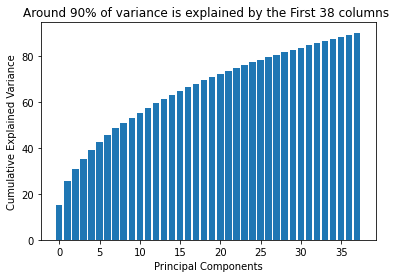

In [26]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 38)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

cum_sum = pca.explained_variance_ratio_.cumsum()
cum_sum = cum_sum * 100

plt.bar(range(38), cum_sum)
plt.ylabel("Cumulative Explained Variance")
plt.xlabel("Principal Components")
plt.title("Around 90% of variance is explained by the First 38 columns ")

Hyperparameter optimization or tuning is the problem of choosing a set of optimal hyperparameters for a learning algorithm. A hyperparameter is a parameter whose value is used to control the learning process. By contrast, the values of other parameters are learned. We will use GridSearchCV from sklearn for choosing the best hyperparameters.

### Define the Parameter Grid:
The parameters list contains dictionaries specifying the hyperparameter values to be tested in the grid search. The first dictionary corresponds to a linear kernel, and the second dictionary corresponds to an RBF kernel with different values for C and gamma.

### Instantiate GridSearchCV:
GridSearchCV is a method in scikit-learn used for hyperparameter tuning, which involves searching for the best combination of hyperparameter values for a given model. It performs an exhaustive search over a specified parameter grid and evaluates the model's performance for each combination using cross-validation.


The GridSearchCV object is created with the following parameters:
SVC(): The base estimator, in this case, a Support Vector Classifier (SVC).
parameters: The parameter grid to search over.
n_jobs=-1: Use all available processors for parallel processing.
verbose=1: Print detailed messages during the grid search.

### Fit the Grid Search:
The fit method is called on the GridSearchCV object to perform the grid search on the training data (X_train, y_train).
After running this code, the GridSearchCV object (search) will contain information about the best hyperparameters found during the search. You can access this information using search.best_params_ and retrieve the best model using search.best_estimator_.

In [28]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Define the parameter grid
parameters = [{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
              {'C': [1, 10, 100, 1000], 'kernel': ['rbf'], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}]

# Create a GridSearchCV object
search = GridSearchCV(SVC(), parameters, n_jobs=-1, verbose=1)

# Fit the grid search to the data
search.fit(X_train, y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


GridSearchCV(estimator=SVC(), n_jobs=-1,
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000],
                          'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,
                                    0.9],
                          'kernel': ['rbf']}],
             verbose=1)

In [31]:
best_parameters = search.best_estimator_
best_parameters

SVC(C=1, kernel='linear')

In [33]:
model = SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)
    
model.fit(X_train, y_train)

SVC(C=1, gamma='auto', kernel='linear')

In [34]:
y_pred=model.predict(X_test)

In [35]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import metrics

print('Accuracy Score:', round(accuracy_score(y_test, y_pred), 2))

Accuracy Score: 0.67


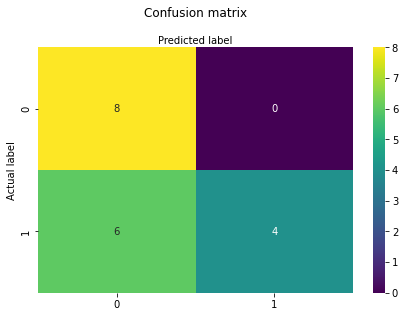

In [37]:
# cm = confusion_matrix(y_test, y_pred)
# class_names=[1,2,3]
# fig, ax = plt.subplots()

from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
class_names=['ALL', 'AML']
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="viridis" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

Well, this example goes to show that if you just predict that every patient has AML, you’ll be correct more often than wrong.


So our SVM classification model predicted the cancer patients with 67% accuracy which is of course not that good. What you can do is try different classifiers like Random forest, K-NN, Gradient Boosting, xgboost, etc and compare the accuracies for each model.